### Exploração: Criação de regras financeiras para definição de risco de credito

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [2]:
df_credit = pd.read_csv('data/corporate_rating_train.csv')
df_credit.head(2)

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,BBB,RPM International Inc.,RPM,Egan-Jones Ratings Company,8/20/2015,Basic Industries,2.324803,1.252078,0.193428,75.963264,...,-57.510867,0.741675,1.886241,1.344624,3.635023,-0.000851,23.162414,2.543218,0.071922,5.180325
1,A,Broadcom Inc.,AVGO,Moody's Investors Service,6/15/2012,Technology,3.980000,3.305714,2.368571,51.250000,...,0.016043,0.845730,2.501165,3.376980,1.219342,0.241866,10.002166,2.957403,0.310788,5.380090


In [3]:
rating_dict = {'AAA': 0,
             'AA': 1,
             'A': 2,
             'BBB': 3,
             'BB': 4,
             'B': 5,
             'CCC': 6,
             'CC': 7,
             'C': 8,
             'D': 9}

# According to Standard & Poor's (S&P)
# S&P Global is a services company that creates financial indices and provides credit ratings
risk_dict = {'AAA': 'Lowest Risk',
             'AA': 'Low Risk',
             'A': 'Low Risk',
             'BBB': 'Medium Risk',
             'BB': 'High Risk',
             'B': 'High Risk',
             'CCC': 'Highest Risk',
             'CC': 'Highest Risk',
             'C': 'Highest Risk',
             'D': 'Highest Risk'}

In [4]:
# Map the 'Rating' column to the new 'Rating_id' column using the rating_dict
df_credit["Rating_id"] = df_credit["Rating"].map(rating_dict)

### Types of Liquidity Ratios

* A current ratio measures a company’s ability to cover short-term liabilities with its current assets. The formula for calculating the current ratio is: Current Ratio = Current Assets / Current Liabilities. Current ratios are the most inclusive of the three formulas, as they account for assets that may be harder to convert into cash. As a result, they provide a “best-case” view of your company’s liquidity.

* A quick ratio measures a company’s ability to cover short-term liabilities with its quick assets—those that can be quickly converted into cash. These typically include money at hand, short-term investments, and accounts receivable. The formula for calculating a quick ratio is: Quick Ratio = (Cash + Short-Term Investments + Accounts Receivable) / Current Liabilities. Quick ratios exclude assets that can’t be readily converted, such as your business’s inventory. By omitting these asset types, quick ratios provide a more conservative assessment than current ratios.

* A cash ratio measures a business’s ability to cover short-term liabilities with cash. The formula for calculating it is: Cash Ratio = (Cash + Short-Term Investments) / Current Liabilities. It considers only cash and short-term investments, making it the most conservative liquidity measure. This ratio helps analysts measure liquidity in "worst-case" scenarios when a company must quickly pay off short-term debt.

Any liquidity ratio above one is usually considered healthy, as it indicates that your company has enough short-term assets to cover your immediate obligations while maintaining a financial cushion. In most cases, the higher the liquidity ratio, the better.

Source: https://online.hbs.edu/blog/post/liquidity-ratios

### Types of Profitability

* Gross margin shows how much profit a company keeps after covering production costs. Gross Margin=(Net Sales/Net sales-COGS)×100 where COGS is the Cost of Goods Sold.

* Operating margin is the percentage of sales left after accounting for COGS as well as normal operating expenses (e.g., sales and marketing, general expenses, administrative expenses) but before accounting for interest and taxes. It compares operating profit to revenue. Operating margin can indicate how efficiently a company manages its operations. That can provide insight into how well those in management keep costs down and maximize profitability. Operating Margin = Operating Earnings/Revenue
​
* The net profit margin, or net margin, reflects a company's ability to generate earnings after all expenses and taxes are accounted for. It's obtained by dividing net income into total revenue. Net profit margin = (Revenue - COGS - Operating and other expenses - Interest - Taxes / Revenue)*100

* Return ratios provide information that can be used to evaluate how well a company generates returns and creates wealth for its shareholders given a certain level of investment deployed to generate such profits. Return on Assets (ROA) see how effective a company is at deploying assets to generate sales and profits. ROA is net income divided by total assets.

Source: https://www.investopedia.com/terms/p/profitabilityratios.asp

### Types of Leverage Ratios

Leverage ratios assess the ability of a company, institution, or individual to meet their financial obligations. Carrying too much debt can be dangerous for a company and its investors, but the debt may help fuel growth if a company’s operations can generate a higher rate of return than the interest rate on its loans.

* The debt ratio reveals how much of the assets of the company can be debt-financed rather than equity-financed. The debt ratio measures how well management can utilize working capital and the debt management capabilities of any company. Companies with a lower debt ratio can opt for more debt capital even if unexpected adverse events arise. Debt ratio = Total Debt/Total Assets

* The debt-to-equity (D/E) ratio is perhaps the most well-known financial leverage ratio. It's expressed as: Debt-to-Equity Ratio = Total Liabilities/Total Shareholders’ Equity, it reveals how much debt a company is using compared to how much stock is outstanding (equity). A high debt/equity ratio generally indicates that a company has been aggressive in financing its growth with debt. This can result in volatile earnings as a result of the additional interest expense. It may increase the company's chances of default or bankruptcy if the company's interest expense grows too high.

Source: 

https://www.investopedia.com/terms/l/leverageratio.asp

https://www.mccrackenalliance.com/blog/leverage-ratio-how-to-measure-debt-risk-and-financial-stability 


### Types of Cash Flow measures

* Free cash flow per share (FCF) is a measure of a company's financial flexibility that is determined by dividing free cash flow by the total number of shares outstanding. This measure signals a company's ability to pay debt, pay dividends, buy back stock and facilitate the growth of the business. Also, the free cash flow per share can be used to give a preliminary prediction concerning future share prices. 

* Operating Cash Flow Per Share refers to the amount of cash a company generates from the revenues it brings in, excluding costs associated with long-term capital investment. It is similar to operating profit but excluding non-cash items and accruals.

Source:

https://www.investopedia.com/terms/f/freecashflowpershare.asp

https://www.stockopedia.com/ratios/operating-cash-flow-per-share-ttm-599/



In [5]:
# CHAT GPT: NECESSARIO CHECAR
# Agrupamento por blocos financeiros

# Liquidez
df_credit["liquidity_score"] = (
    0.33 * df_credit["currentRatio"] +
    0.33 * df_credit["quickRatio"] +
    0.33 * df_credit["cashRatio"]
)

# Rentabilidade
df_credit["profitability_score"] = (
    0.25 * df_credit["grossProfitMargin"] +
    0.25 * df_credit["operatingProfitMargin"] +
    0.25 * df_credit["netProfitMargin"] +
    0.25 * df_credit["returnOnAssets"]
)

# Endividamento
df_credit["leverage_score"] = (
    0.5 * df_credit["debtRatio"] +
    0.5 * df_credit["debtEquityRatio"]
)

# Fluxo de Caixa
df_credit["cashflow_score"] = (
    0.5 * df_credit["operatingCashFlowPerShare"] +
    0.5 * df_credit["freeCashFlowPerShare"]
)

In [6]:
# Normalização dos scores para garantir que estejam na mesma escala

score_cols = [
    "liquidity_score",
    "profitability_score",
    "leverage_score",
    "cashflow_score"
]

# scaler = StandardScaler()
# df_credit[score_cols] = scaler.fit_transform(df_credit[score_cols])


In [7]:
# Cálculo do score financeiro final com pesos personalizados

df_credit["financial_health_score"] = (
    0.25 * df_credit["liquidity_score"] +
    0.25 * df_credit["profitability_score"] -
    0.25 * df_credit["leverage_score"] +
    0.25 * df_credit["cashflow_score"]
)

In [8]:
df_credit[["Rating", "financial_health_score"]+ score_cols].head(10)

,Rating,financial_health_score,liquidity_score,profitability_score,leverage_score,cashflow_score
0,BBB,0.480855,1.244202,0.144450,1.679961,2.214730
1,A,1.504083,3.185914,0.300747,0.199614,2.729284
2,BBB,0.727342,0.696806,0.278488,4.366105,6.300177
3,A,1.310062,0.881368,0.181424,1.024638,5.202094
4,BB,0.736496,1.640708,0.061555,0.846033,2.089753
5,BB,0.324249,1.222441,0.267557,1.134943,0.941941
6,B,2.700745,0.952664,0.288411,-1.849611,7.712295
7,B,2.495424,0.705838,0.025706,1.593941,10.844092
8,BBB,0.235283,0.326512,0.306080,1.547794,1.856332
9,BB,2.153835,1.454142,0.313250,0.635878,7.483823


In [9]:
def rule_based_risk(row):
    flags = 0

    if row["liquidity_score"] < 1:
    # Ideally the liquidity ratios will be greater than 1
        flags += 1
    if row["profitability_score"] < 0.2:
    # We want a profitability ratio greater than 20%
        flags += 1
    if row["leverage_score"] > 2:
    # Don't want a leverage ratio greater than 2
        flags += 1
    if row["cashflow_score"] < 0.2:
    # minimun operatingCashFlowPerShare of 20%
        flags += 1

    return flags

df_credit["rule_flags"] = df_credit.apply(rule_based_risk, axis=1)

In [10]:
# Classificação de risco com base no score financeiro e na classificação de crédito
df_credit["high_risk"] = (df_credit["Rating_id"] >= 5).astype(int)
features = score_cols + ["financial_health_score"] + ["rule_flags"]

# Classificação bnaria: 1 para alto risco (Rating_id >= 5), 0 para baixo risco (Rating_id < 5)
X = df_credit[features]
y = df_credit["high_risk"]


In [11]:
# Divisão dos dados em treino e teste e treinamento do modelo XGBoost

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = XGBClassifier(n_estimators=100, booster='gbtree', objective='binary:logistic')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       265
           1       0.59      0.43      0.50        60

    accuracy                           0.84       325
   macro avg       0.73      0.68      0.70       325
weighted avg       0.83      0.84      0.83       325



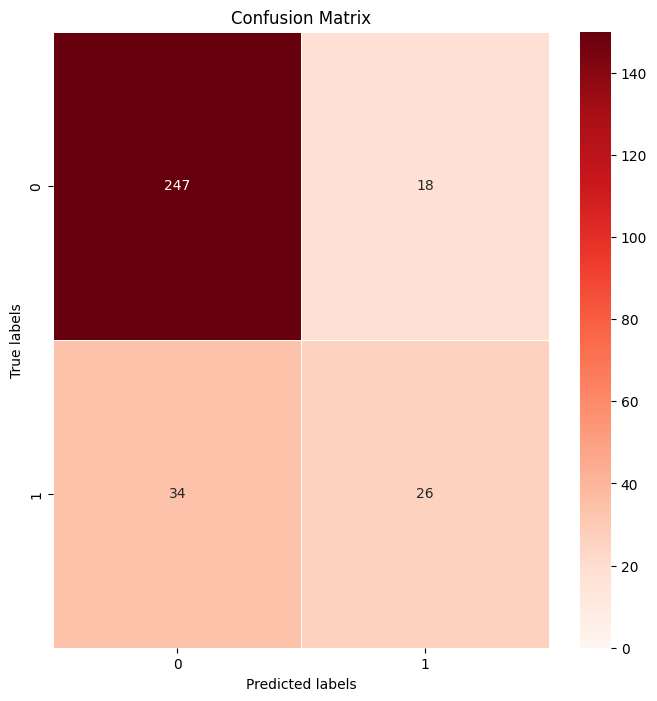

In [14]:
# Create a confusion matrix and display it with seaborn heatmap
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(cm, annot = True, ax = ax, vmin=0, vmax=150, fmt="d", linewidths=.5, linecolor = 'white', cmap="Reds") # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [15]:
df_credit["risk_probability"] = model.predict_proba(X)[:, 1]


In [16]:
df_credit["final_risk_score"] = (df_credit["risk_probability"])


In [17]:
df_credit["risk_bucket"] = pd.cut(
    df_credit["final_risk_score"],
    bins=[0, 0.33, 0.66, 1],
    labels=["Low", "Medium", "High"]
)


In [25]:
# Create dataframe to compare rating rule flags final risk score rsc bucket and model probability
df_comparison = pd.DataFrame({
    "Name": df_credit["Name"],
    "Rating": df_credit["Rating"],
    "Financial Health Score": df_credit["financial_health_score"],
    "Rule Flags": df_credit["rule_flags"],
    "ML Risk Probability": df_credit["risk_probability"],
    "Risk Bucket": df_credit["risk_bucket"]
})

In [22]:
df_comparison.head(5)

,Name,Rating,Financial Health Score,Rule Flags,ML Risk Probability,Risk Bucket
0,RPM International Inc.,BBB,0.480855,1,0.015164,Low
1,Broadcom Inc.,A,1.504083,0,0.009324,Low
2,Tenneco Inc.,BBB,0.727342,2,0.031046,Low
3,Dover Corporation,A,1.310062,2,0.000382,Low
4,Briggs & Stratton Corporation,BB,0.736496,1,0.002821,Low


In [23]:
df_comparison[df_comparison['Rating'] == 'C']

,Name,Rating,Financial Health Score,Rule Flags,ML Risk Probability,Risk Bucket
245,Caesars Entertainment Corporation,C,-1.268675,3,0.846576,High
313,Cleveland-Cliffs Inc.,C,0.208304,3,0.971439,High
